In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

 #Folder Name:Dataset II
DATADIR = "DATASET"

In [10]:
CATEGORIES = os.listdir(DATADIR)

In [11]:
CATEGORIES

['downdog', 'tree', '.DS_Store', 'warrior2', 'goddess', 'plank', 'Namaste']

In [12]:
CATEGORIES.remove('.DS_Store')

In [13]:
CATEGORIES

['downdog', 'tree', 'warrior2', 'goddess', 'plank', 'Namaste']

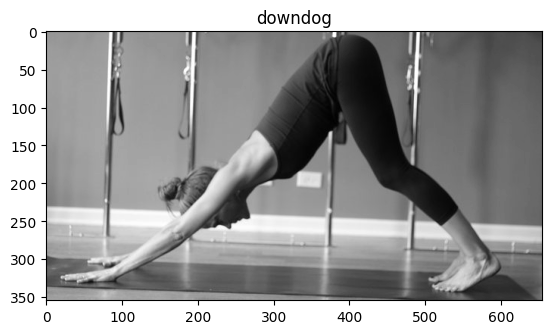

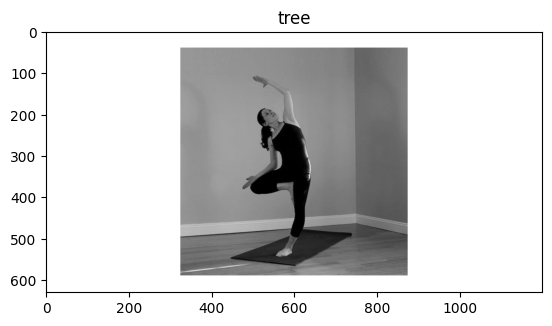

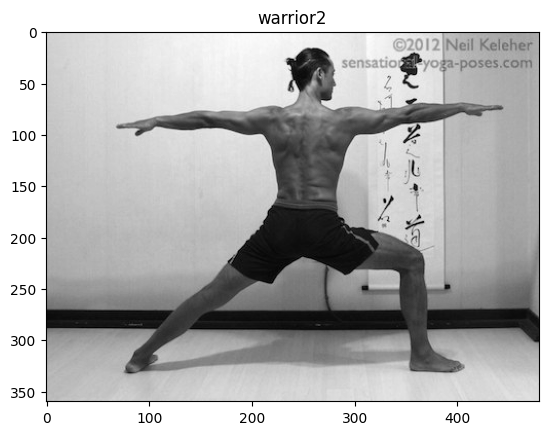

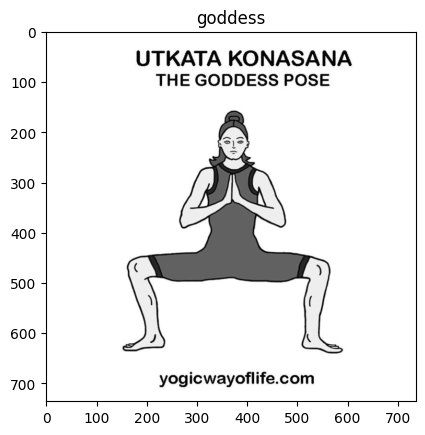

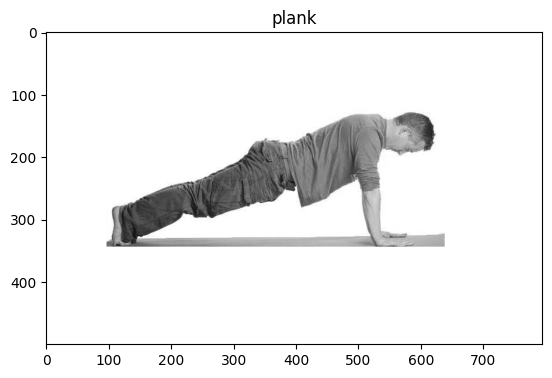

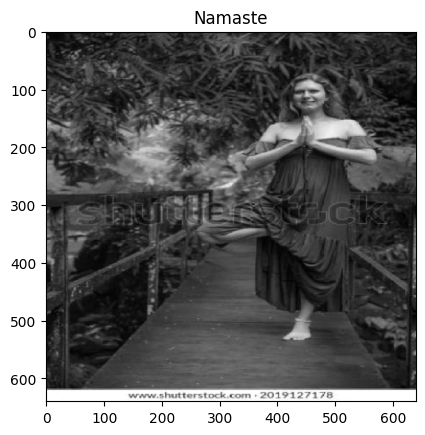

In [14]:
                                                              
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)  # create path to category
    for img in os.listdir(path):  # iterate over each image per category
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)  # convert to array in grayscale
        if img_array is not None:
            plt.imshow(img_array, cmap='gray')  # display grayscale image
            plt.title(f'{category}')  # add title to indicate the category
            plt.show()  # display!


            break  # we just want one for now, so break to the next category


In [15]:
#Resizing images into fixed Size:
import cv2
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

# Define constants and initialize training data
IMG_SIZE = 50
training_data = []

# Function to create training data
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)

        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                print(f"Error processing image {img}: {e}")
                pass

create_training_data()
print(len(training_data))




100%|██████████| 212/212 [00:00<00:00, 728.96it/s]

1293


In [16]:
# !pip install mediapipe
# !pip install opencv-python
import math
import cv2
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

In [17]:
# Initializing mediapipe pose class.
mp_pose = mp.solutions.pose

# Setting up the Pose function.
pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.3, model_complexity=2)

# Initializing mediapipe drawing class, useful for annotation.
mp_drawing = mp.solutions.drawing_utils

I0000 00:00:1723110181.308841  148490 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89), renderer: Apple M1


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1723110181.435009  154516 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1723110181.487481  154523 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


Image shape: (640, 640, 3)
Image dtype: uint8


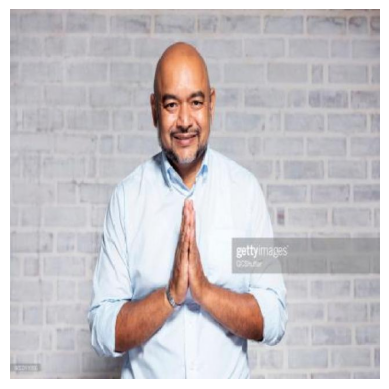

In [18]:
image_path = 'DATASET/Namaste/43_jpg.rf.ea8d9762cc0ea109a1eca3a86ac5e627.jpg'
sample_img = cv2.imread(image_path)


# Check if the image was loaded correctly
if sample_img is not None:
    print(f"Image shape: {sample_img.shape}")
    print(f"Image dtype: {sample_img.dtype}")
    # Convert the image from BGR to RGB
    sample_img_rgb = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
    # Display the image
    plt.imshow(sample_img_rgb)
    plt.axis('off')  # Hide the axes
    plt.show()
else:
    print("Error: Image not loaded. Check the file path and format.")




In [19]:
# Perform pose detection after converting the image into RGB format.
results = pose.process(cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB))

# Check if any landmarks are found.
if results.pose_landmarks:

    # Iterates all 33 landmarks.
    for i in range(33):

        # Display the found normalized landmarks.
        print(f'{mp_pose.PoseLandmark(i).name}:\n{results.pose_landmarks.landmark[mp_pose.PoseLandmark(i).value]}')

NOSE:
x: 0.477480084
y: 0.30311352
z: -0.898299813
visibility: 0.998452902

LEFT_EYE_INNER:
x: 0.499962896
y: 0.261471748
z: -0.846944
visibility: 0.996343315

LEFT_EYE:
x: 0.51418364
y: 0.261476398
z: -0.84774065
visibility: 0.99640888

LEFT_EYE_OUTER:
x: 0.529670179
y: 0.263166904
z: -0.847741604
visibility: 0.996393144

RIGHT_EYE_INNER:
x: 0.45254451
y: 0.261807144
z: -0.844861031
visibility: 0.997916043

RIGHT_EYE:
x: 0.439037383
y: 0.2625705
z: -0.84576
visibility: 0.99857688

RIGHT_EYE_OUTER:
x: 0.425041497
y: 0.264045298
z: -0.846482873
visibility: 0.9987275

LEFT_EAR:
x: 0.545158565
y: 0.274526298
z: -0.500474513
visibility: 0.998737872

RIGHT_EAR:
x: 0.407455385
y: 0.274854422
z: -0.491851151
visibility: 0.998177886

MOUTH_LEFT:
x: 0.505208313
y: 0.344327033
z: -0.757591307
visibility: 0.998991787

MOUTH_RIGHT:
x: 0.449414074
y: 0.34249872
z: -0.760390282
visibility: 0.998894751

LEFT_SHOULDER:
x: 0.635022283
y: 0.499969095
z: -0.2569004
visibility: 0.999726593

RIGHT_SHOULDER

/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [20]:
                        #Image preprocessed , now using Pandas we create dataframe and convert it to csv file.
import os
import cv2
import mediapipe as mp
import pandas as pd
from tqdm import tqdm

# # Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

mp_drawing = mp.solutions.drawing_utils

# DataFrame to store the landmark coordinates
columns = []
for i in range(33):
    columns.extend([f'x_{i}_landmark', f'y_{i}_landmark', f'z_{i}_landmark'])
columns.append('category')  # Add column for the category
df = pd.DataFrame(columns=columns)

def extract_landmarks(image):
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if results.pose_landmarks:
        landmarks = results.pose_landmarks.landmark
        row = []
        for landmark in landmarks:
            row.extend([landmark.x, landmark.y, landmark.z])
        return row
    else:
        return None

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in tqdm(os.listdir(path)):
        try:
            img_path = os.path.join(path, img)
            image = cv2.imread(img_path)
            landmarks = extract_landmarks(image)
            if landmarks:
                landmarks.append(category)  # Add the category to the landmarks list
                df.loc[len(df)] = landmarks
            else:
                print(f"No landmarks detected in image: {img_path}")
        except Exception as e:
            print(f"Error processing image {img_path}: {e}")

# Save the DataFrame to a CSV file
df.to_csv('pose_landmarks_with_categories(Test).csv', index=False)



I0000 00:00:1723110226.344219  148490 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 89), renderer: Apple M1
  0%|          | 0/223 [00:00<?, ?it/s]W0000 00:00:1723110226.465168  155426 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1723110226.478761  155428 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
  0%|          | 1/223 [00:00<00:36,  6.04it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib

No landmarks detected in image: DATASET/downdog/00000212.png
No landmarks detected in image: DATASET/downdog/00000367.png


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
  6%|▌         | 13/223 [00:00<00:08, 24.49it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_

No landmarks detected in image: DATASET/downdog/00000188.png
No landmarks detected in image: DATASET/downdog/00000361.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 24%|██▍       | 53/223 [00:02<00:06, 27.63it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_

No landmarks detected in image: DATASET/downdog/00000203.png


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/downdog/00000304.jpg
No landmarks detected in image: DATASET/downdog/00000306.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/downdog/00000303.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/downdog/00000316.jpg
No landmarks detected in image: DATASET/downdog/00000300.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/downdog/00000319.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 52%|█████▏    | 117/223 [00:04<00:03, 27.11it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message

No landmarks detected in image: DATASET/downdog/00000291.jpg
No landmarks detected in image: DATASET/downdog/00000332.jpg
No landmarks detected in image: DATASET/downdog/00000322.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 55%|█████▌    | 123/223 [00:04<00:03, 27.19it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message

No landmarks detected in image: DATASET/downdog/00000135.jpg
No landmarks detected in image: DATASET/downdog/00000337.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/downdog/00000240.jpg
No landmarks detected in image: DATASET/downdog/00000334.jpg
No landmarks detected in image: DATASET/downdog/00000320.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/downdog/00000232.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/downdog/00000387.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/downdog/00000147.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 84%|████████▍ | 188/223 [00:07<00:01, 25.68it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message

No landmarks detected in image: DATASET/downdog/00000427.jpg
No landmarks detected in image: DATASET/downdog/00000194.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/downdog/00000220.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 92%|█████████▏| 205/223 [00:07<00:00, 28.17it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message

No landmarks detected in image: DATASET/downdog/00000222.jpg
No landmarks detected in image: DATASET/downdog/00000155.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/tree/00000158.jpg
No landmarks detected in image: DATASET/tree/00000165.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/tree/00000173.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
  9%|▉         | 15/160 [00:00<00:07, 19.27it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_

No landmarks detected in image: DATASET/tree/00000166.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 13%|█▎        | 21/160 [00:00<00:07, 18.99it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_

No landmarks detected in image: DATASET/tree/File83.jpg
No landmarks detected in image: DATASET/tree/File41.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 16%|█▌        | 25/160 [00:01<00:06, 20.66it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_

No landmarks detected in image: DATASET/tree/00000203.png
No landmarks detected in image: DATASET/tree/00000202.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 24%|██▍       | 38/160 [00:01<00:04, 24.79it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_

No landmarks detected in image: DATASET/tree/00000160.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 26%|██▋       | 42/160 [00:01<00:05, 22.32it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_

No landmarks detected in image: DATASET/tree/00000106.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/tree/00000114.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/tree/00000126.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 50%|█████     | 80/160 [00:03<00:03, 22.11it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_

No landmarks detected in image: DATASET/tree/00000118.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/tree/00000135.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/tree/00000151.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/tree/File66.jpg
No landmarks detected in image: DATASET/tree/00000152.jpg
No landmarks detected in image: DATASET/tree/00000191.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/tree/File71.jpg
No landmarks detected in image: DATASET/tree/00000143.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 91%|█████████▏| 146/160 [00:06<00:00, 23.30it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message

No landmarks detected in image: DATASET/tree/00000154.png


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/warrior2/00000401.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/warrior2/00000210.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 12%|█▏        | 30/252 [00:01<00:10, 21.43it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_

No landmarks detected in image: DATASET/warrior2/00000410.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/warrior2/00000312.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/warrior2/00000207.jpeg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/warrior2/00000326.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/warrior2/00000137.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/warrior2/00000346.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 76%|███████▌  | 192/252 [00:07<00:02, 25.10it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message

No landmarks detected in image: DATASET/warrior2/00000153.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 82%|████████▏ | 207/252 [00:08<00:01, 24.33it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message

No landmarks detected in image: DATASET/warrior2/00000342.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/warrior2/00000182.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
  0%|          | 0/180 [00:00<?, ?it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.G

No landmarks detected in image: DATASET/goddess/00000165.jpg
No landmarks detected in image: DATASET/goddess/00000173.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/goddess/00000202.jpg
No landmarks detected in image: DATASET/goddess/00000339.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/goddess/00000112.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/goddess/00000299.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 36%|███▌      | 65/180 [00:02<00:04, 23.81it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_

No landmarks detected in image: DATASET/goddess/00000317.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/goddess/00000262.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 43%|████▎     | 77/180 [00:03<00:05, 20.23it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_

No landmarks detected in image: DATASET/goddess/00000315.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 49%|████▉     | 89/180 [00:03<00:05, 17.62it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_

No landmarks detected in image: DATASET/goddess/00000292.jpg
No landmarks detected in image: DATASET/goddess/00000251.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 56%|█████▌    | 101/180 [00:04<00:03, 23.70it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message

No landmarks detected in image: DATASET/goddess/00000119.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 60%|██████    | 108/180 [00:04<00:02, 26.59it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message

No landmarks detected in image: DATASET/goddess/00000378.jpg
No landmarks detected in image: DATASET/goddess/00000146.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 84%|████████▍ | 152/180 [00:06<00:01, 21.05it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message

No landmarks detected in image: DATASET/goddess/00000190.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/goddess/00000143.jpg
No landmarks detected in image: DATASET/goddess/00000142.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 91%|█████████ | 164/180 [00:06<00:00, 22.88it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message

No landmarks detected in image: DATASET/goddess/00000223.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 98%|█████████▊| 177/180 [00:07<00:00, 21.18it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message

No landmarks detected in image: DATASET/plank/00000205.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 12%|█▏        | 32/266 [00:01<00:09, 24.00it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_

No landmarks detected in image: DATASET/plank/00000229.jpg
No landmarks detected in image: DATASET/plank/00000387.jpeg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 20%|██        | 54/266 [00:02<00:08, 24.79it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_

No landmarks detected in image: DATASET/plank/00000177.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 21%|██▏       | 57/266 [00:02<00:08, 25.02it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_

No landmarks detected in image: DATASET/plank/00000216.jpg
No landmarks detected in image: DATASET/plank/00000376.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 28%|██▊       | 75/266 [00:03<00:07, 24.82it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_

No landmarks detected in image: DATASET/plank/00000339.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 30%|███       | 81/266 [00:03<00:07, 25.11it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_

No landmarks detected in image: DATASET/plank/00000258.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 33%|███▎      | 88/266 [00:03<00:07, 23.51it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_

No landmarks detected in image: DATASET/plank/00000266.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 35%|███▌      | 94/266 [00:03<00:07, 24.55it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_

No landmarks detected in image: DATASET/plank/00000307.png


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/plank/00000289.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/plank/00000248.jpg
No landmarks detected in image: DATASET/plank/00000275.jpg
No landmarks detected in image: DATASET/plank/00000315.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 45%|████▍     | 119/266 [00:04<00:05, 25.49it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message

No landmarks detected in image: DATASET/plank/00000318.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 47%|████▋     | 125/266 [00:05<00:05, 25.68it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message

No landmarks detected in image: DATASET/plank/00000292.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 50%|█████     | 134/266 [00:05<00:05, 22.63it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message

No landmarks detected in image: DATASET/plank/00000331.jpg
No landmarks detected in image: DATASET/plank/00000131.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/plank/00000252.jpg
No landmarks detected in image: DATASET/plank/00000326.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 58%|█████▊    | 153/266 [00:06<00:05, 21.35it/s]

No landmarks detected in image: DATASET/plank/00000336.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/plank/00000309.jpg
No landmarks detected in image: DATASET/plank/00000296.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/plank/00000240.jpg
No landmarks detected in image: DATASET/plank/00000136.png


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 69%|██████▉   | 183/266 [00:07<00:03, 25.13it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message

No landmarks detected in image: DATASET/plank/00000179.png


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/plank/00000226.jpg
No landmarks detected in image: DATASET/plank/00000150.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/plank/00000420.jpg
No landmarks detected in image: DATASET/plank/00000378.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 78%|███████▊  | 207/266 [00:08<00:02, 24.21it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message

No landmarks detected in image: DATASET/plank/00000146.png
No landmarks detected in image: DATASET/plank/00000218.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/plank/00000225.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/plank/00000345.jpg
No landmarks detected in image: DATASET/plank/00000355.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 85%|████████▍ | 226/266 [00:09<00:01, 24.25it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message

No landmarks detected in image: DATASET/plank/00000194.png


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/plank/00000234.jpg
No landmarks detected in image: DATASET/plank/00000181.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 89%|████████▉ | 238/266 [00:09<00:01, 23.85it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message

No landmarks detected in image: DATASET/plank/00000154.jpg
No landmarks detected in image: DATASET/plank/00000236.png


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 96%|█████████▌| 256/266 [00:10<00:00, 24.49it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message

No landmarks detected in image: DATASET/plank/00000196.jpg
No landmarks detected in image: DATASET/plank/00000169.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/Namaste/509_jpg.rf.9b5403de2b4cda4a904598e6ab236d89.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
  4%|▍         | 9/212 [00:00<00:07, 26.94it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_f

No landmarks detected in image: DATASET/Namaste/855_jpg.rf.928e0dbfe6062e12f10d0d6fedfb0a5d.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/Namaste/735_jpg.rf.a3707710c64e36c48ae8c28fd147d256.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 34%|███▍      | 72/212 [00:02<00:05, 25.45it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_

No landmarks detected in image: DATASET/Namaste/299_jpg.rf.bb62854f33c0148a03065c5c6fb676dd.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabas

No landmarks detected in image: DATASET/Namaste/468_jpg.rf.c9e0e5da4fe46077fc8902f4f34976e1.jpg
No landmarks detected in image: DATASET/Namaste/1528_jpg.rf.950ffc390b2e13cdd965157d10f24760.jpg


/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '
 90%|████████▉ | 190/212 [00:06<00:00, 27.95it/s]/Users/dev02chandan/Documents/Office@MatiriAI/Pose Estimation/venv/lib/python3.11/site-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message